# dota2数据基本分析
## 1.导入所需模块

In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2.数据读取

In [38]:
path = 'C:/Users/hankk/Documents/JOBS'
os.chdir(path)

In [40]:
trainSets = pd.read_csv('dota2_train.csv')
testSets = pd.read_csv('dota2_test.csv')

## 3.查看数据集基本情况
> 查看变量、数据、以及数据集大小

In [6]:
trainSets.shape

(92650, 118)

In [7]:
trainSets.head()

,won,cluster_id,mode,type,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,techies,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,oracle,winter_wyvern,arc_warden,mode_name
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,normal
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,normal
3,1,154,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,normal



## 4.预处理
> 将未知名的英雄标注为unname

In [41]:
rename_dt = dict()
i = 1
for name in trainSets.columns:
    try:
        int(name)
        rename_dt[name] = 'unname_hero' + str(i)
        i += 1
    except ValueError:
        pass

In [42]:
trainSets = trainSets.rename(columns=rename_dt)

> 组合胜利英雄组合与失利英雄组合

In [21]:
heros = [x for x in trainSets.columns if x not in ['won', 'cluster_id', 'mode', 'type', 'mode_name']]
trainSets['player'] = [np.nan]*trainSets.shape[0]
trainSets['match'] = [np.nan]*trainSets.shape[0]

for i in trainSets.index:
    rowdata = trainSets.loc[i, heros]
    player = [0] * 5
    match = [0] * 5
    for j in rowdata.index:
        val = rowdata[j]
        if val == 1:
            player.append(j)
        elif val == -1:
            match.append(j)
        else:
            pass
        
    # player_val = '&'.join(player)
    # match_val = '&'.join(match)
    trainSets.loc[i, 'player'] = player_val
    trainSets.loc[i, 'match'] = match_val

   
        


In [20]:
trainSets['player'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: player, dtype: float64

## 5. 单变量分析
> 最受玩家欢迎的模式

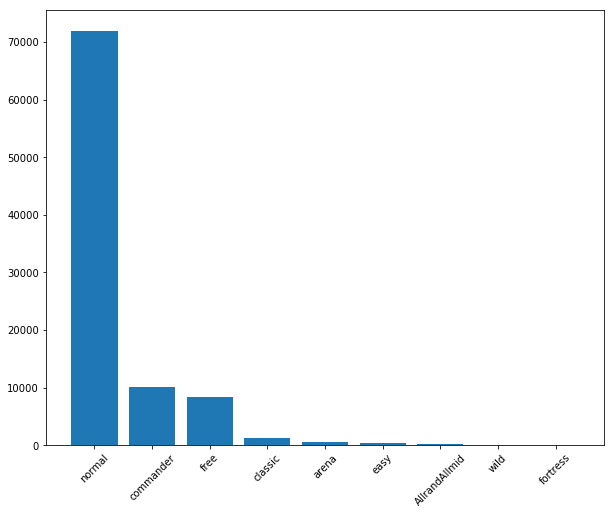

In [43]:
plt.figure(figsize=(10, 8))
counts_of_mode = trainSets['mode_name'].value_counts()
plt.bar(range(counts_of_mode.shape[0]), counts_of_mode.values)
plt.xticks(range(counts_of_mode.shape[0]), counts_of_mode.index, rotation=45)
plt.show()

**说明:**最受玩家喜爱的模式为【普通】normal,【指挥官】commander,【自由】模式，而【堡垒】fortress，【野外】wild模式比例较小
> 对该变量，可以进行类别特征合并处理

> 匹配类型分布

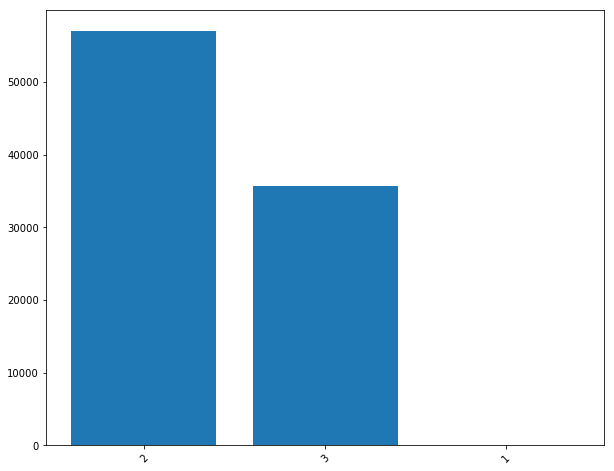

In [44]:
plt.figure(figsize=(10, 8))
counts_of_type = trainSets['type'].value_counts()
plt.bar(range(counts_of_type.shape[0]), counts_of_type.values)
plt.xticks(range(counts_of_type.shape[0]), counts_of_type.index, rotation=45)
plt.show()

**说明:**1类型数量偏少，2，3较多，预处理上可以忽略1的影响

> 最受玩家欢迎的英雄

In [46]:
heros = [x for x in trainSets.columns if x not in ['won', 'cluster_id', 'mode', 'type', 'mode_name']]
hero_freq = dict()
for hero in heros:
    hero_data = trainSets[hero]
    hero_data = np.where(hero_data == -1, 1, hero_data)
    hero_freq[hero] = hero_data.sum()
    
hero_counts= pd.Series(hero_freq)

In [48]:
hero_counts.sort_values().head()

abyssal_underlord       0
unname_hero1            0
chen                  790
visage                888
brewmaster           1558
dtype: int64

In [49]:
hero_counts.sort_values(ascending=False).head()

mirana              32048
phantom_assassin    29802
pudge               28285
legion_commander    26521
juggernaut          23327
dtype: int64

**说明:**最受欢迎的英雄前五，以及最不受欢迎的英雄前五

> 长胜将军
>> 最容易获胜的英雄top5

In [50]:
trainSets.won.value_counts()

 1    48782
-1    43868
Name: won, dtype: int64

In [51]:
won_games = trainSets.loc[trainSets['won']==1, :]
loss_games = trainSets.loc[trainSets['won']==-1, :]

In [79]:
hero_win_loss1 = dict()
for hero in heros:
    hero_ses = won_games[hero].value_counts()
    try:
        hero_win_times = hero_ses[1]
    hero_loss_times = hero_ses[-1]
    hero_win_loss1[hero] = {'win':hero_win_times, 'loss':hero_loss_times}

    
hero_win_loss2 = dict()
for hero in heros:
    hero_ses = loss_games[hero].value_counts()
    hero_win_times = hero_ses[-1]
    hero_loss_times = hero_ses[1]
    hero_win_loss2[hero] = {'win':hero_win_times, 'loss':hero_loss_times}
    



KeyError: 1

In [69]:
won_games_pct.sort_values(ascending=False).head()

92647    0
30807    0
30819    0
30818    0
30817    0
dtype: int64

In [78]:
won_games[hero].value_counts()[-1]

508